# CUSTOMER GRATICATION IN AIRLINE INDUSTRY

Airplanes have always been one of the first choices for people to travel because of their convenience and safety. 
Customer satisfaction is increasingly recognized as a determinant of business performance and a strategic tool for 
gaining competitive advantage. High and stable customer satisfaction is considered an important determinant of an 
organizations long-term profitability. Predicting aircraft passenger satisfaction and excavating the main
influencing factors can help airlines improve their services and gain advantages in difficult situations and competition. 
The source of Dataset is Kaggle.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt 
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
a=pd.read_csv('airline_passenger.csv')

In [3]:
a.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
a.shape

(103904, 24)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [6]:
#PREPROCESSING
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
a.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
a['Gender']=le.fit_transform(a['Gender'])
a['Customer Type']=le.fit_transform(a['Customer Type'])
a['Type of Travel']=le.fit_transform(a['Type of Travel'])
a['Class']=le.fit_transform(a['Class'])

In [10]:
a.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
ds_x = a.drop('satisfaction',axis='columns')
y=a['satisfaction']

In [14]:
dataset=sc.fit_transform(ds_x)

In [15]:
x=pd.DataFrame(dataset,columns=ds_x.columns)

In [16]:
a.describe()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,...,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,...,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [17]:
a.isnull()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
a.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [19]:
a.dropna(inplace=True)
a.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [20]:
a.value_counts("satisfaction")

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
dtype: int64

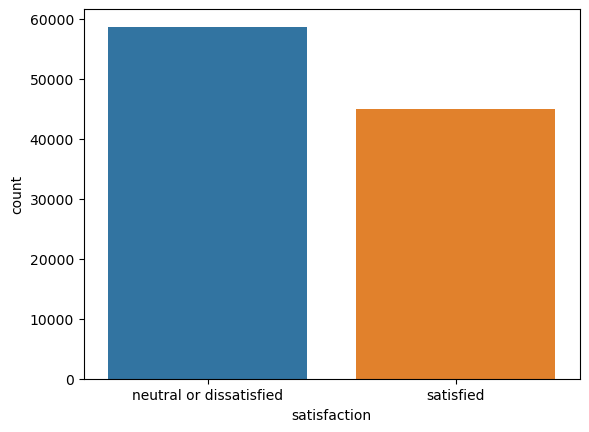

In [21]:
#Data Visualizing
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='satisfaction',data=a)
plt.show()

C:\Users\Sujitha\AppData\Local\Temp\ipykernel_15640\2210590007.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr(), annot = True , cmap = "YlGnBu");


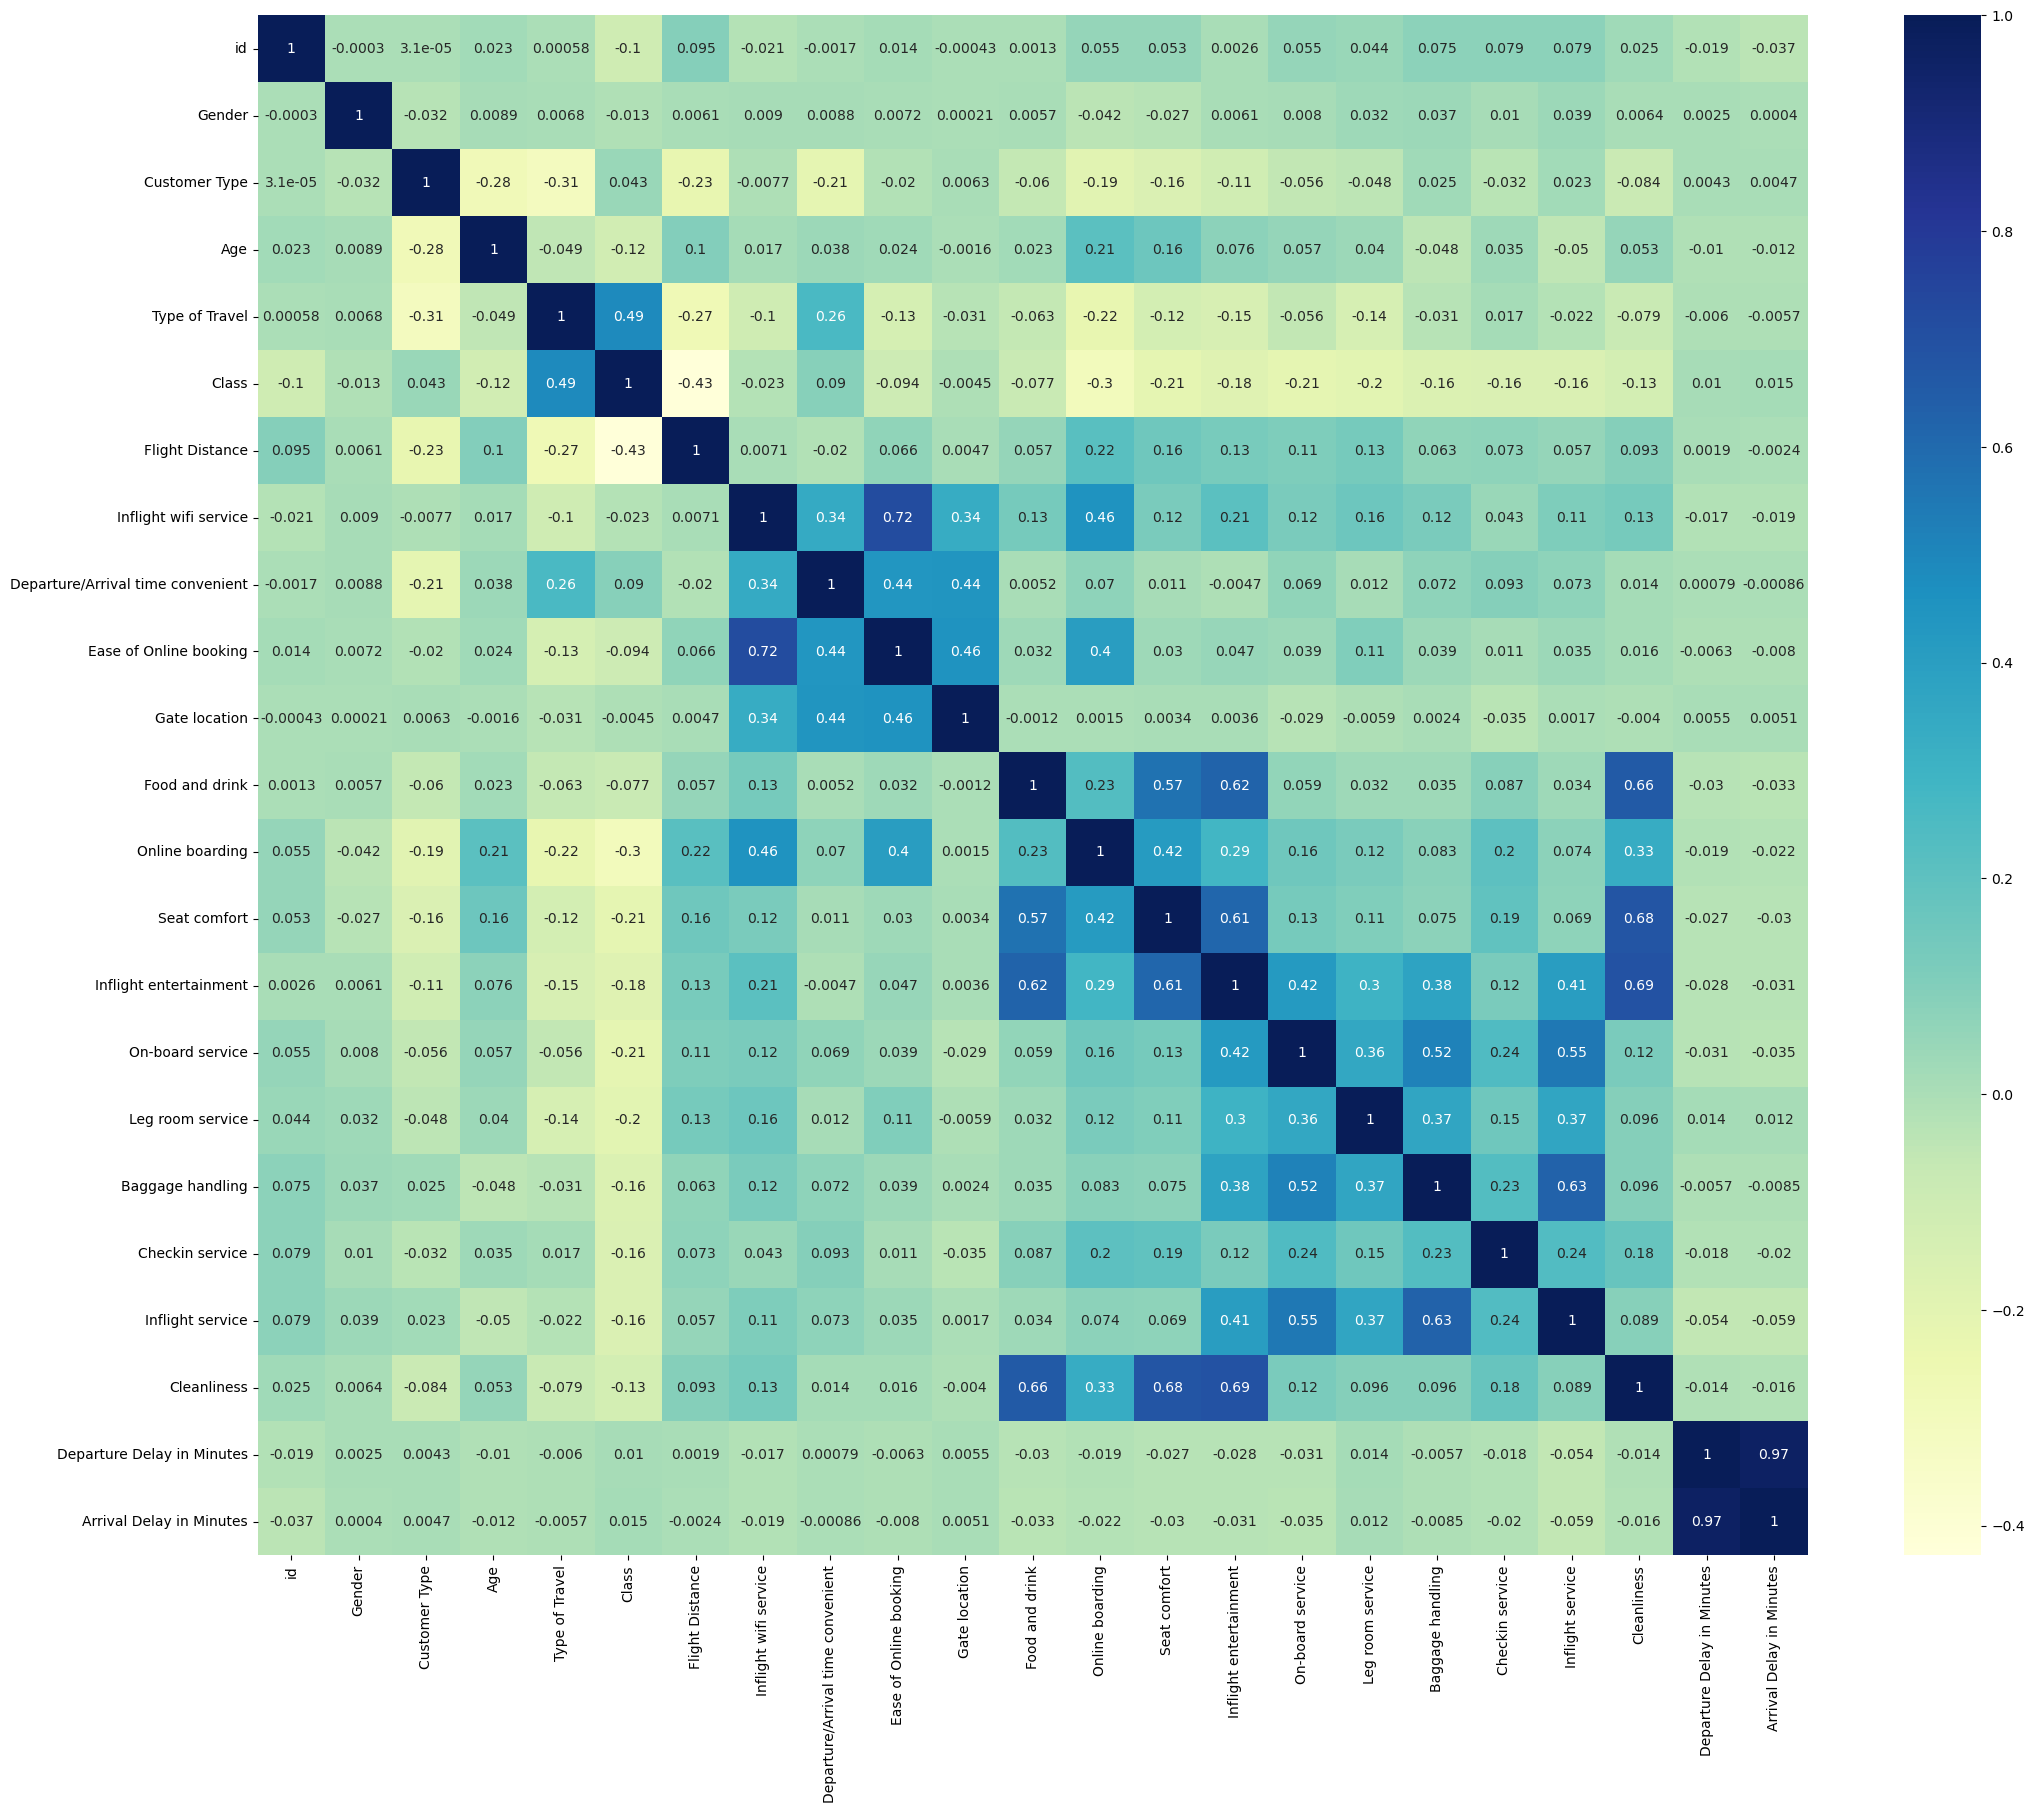

In [22]:
# Plotting a heatmap to show the correlation between features
plt.figure(figsize = (25,20))
sns.heatmap(a.corr(), annot = True , cmap = "YlGnBu");

(array([1.4000e+01, 1.2441e+04, 1.7579e+04, 1.9080e+04, 2.9335e+04,
        2.5145e+04]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

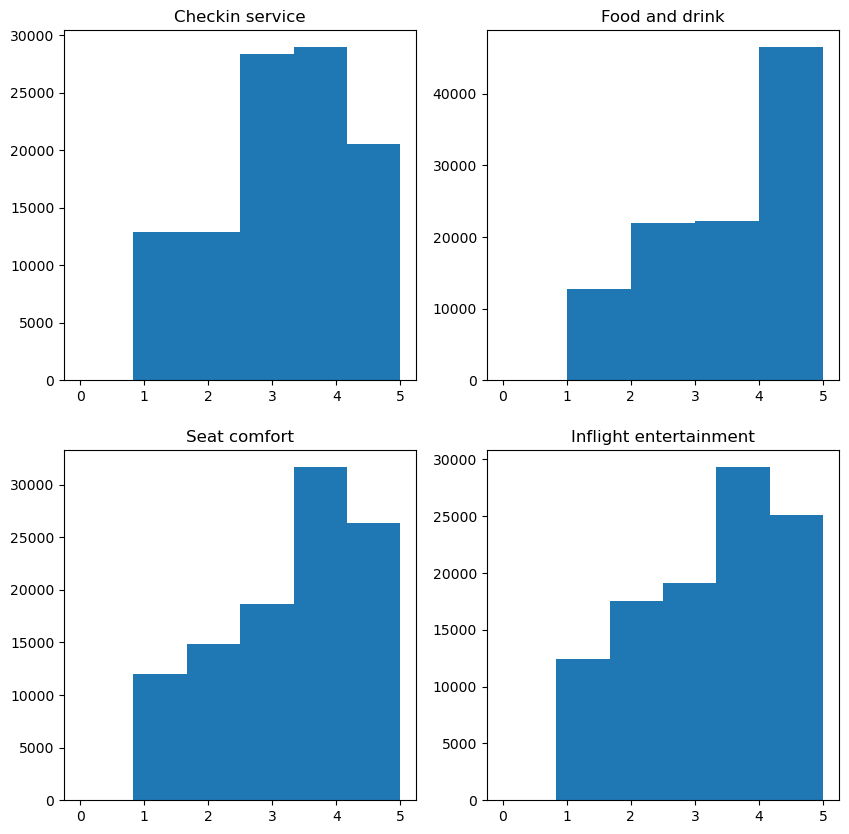

In [23]:
#Histogram
fig, axes = plt.subplots(2,2,figsize=(10,10))
axes[0,0].set_title("Checkin service")
axes[0,0].hist(a['Checkin service'],bins=6)
axes[0,1].set_title("Food and drink")
axes[0,1].hist(a['Food and drink'],bins=5)
axes[1,0].set_title("Seat comfort")
axes[1,0].hist(a['Seat comfort'],bins=6)
axes[1,1].set_title("Inflight entertainment")
axes[1,1].hist(a['Inflight entertainment'],bins=6)

In [24]:
#Spliting Dataset
training,test=train_test_split(a,test_size=0.3)

In [25]:
x_train=training.drop('satisfaction',axis=1)

In [26]:
y_train=training['satisfaction']

In [27]:
x_test=test.drop('satisfaction',axis=1)

In [28]:
y_test=test['satisfaction']

# Support Vector Machine

In [29]:
from sklearn.svm import LinearSVC
svm=LinearSVC(random_state=0)

In [30]:
svm.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [31]:
svm.score(x_train,y_train)

0.704033648210715

In [32]:
svm_pred=svm.predict(x_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test,svm_pred))

Accuracy: 0.705460278644744


# DECISION TREE CLASIFIER

In [34]:
from sklearn.tree import DecisionTreeClassifier
#create Decision Tree Classifier object
clf=DecisionTreeClassifier()

#Train Decision Tree Classifier
clf=clf.fit(x_train,y_train)

#predict the response for test dataset
clf_pred=clf.predict(x_test)

In [35]:
#Model Accuracy, how oftern is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,clf_pred))

Accuracy: 0.9450432768107082


# Naive bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [37]:
model.score(x_train,y_train)

0.809032613941943

In [38]:
model_pred=model.predict(x_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test,model_pred))

Accuracy: 0.8116091251327263


# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
rf.score(x_train,y_train)

1.0

In [42]:
rf_pred=rf.predict(x_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test,rf_pred))

Accuracy: 0.9622896489591042


# LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
lg.score(x_train,y_train)

0.7270219954492174

In [46]:
lg_pred=lg.predict(x_test)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test,lg_pred))

Accuracy: 0.7219344251745552


In [48]:
Models = ['Support Vector Machine','Decision Tree Classifier','Naive Bayes','Random Forest Classifier','Logistic Regression']
Model = [svm,clf,model,rf,lg]
Accuracy=[metrics.accuracy_score(y_test,svm_pred),metrics.accuracy_score(y_test,clf_pred),metrics.accuracy_score(y_test,model_pred),metrics.accuracy_score(y_test,rf_pred),metrics.accuracy_score(y_test,lg_pred)]
df_models = pd.DataFrame(data = [Model,Accuracy], index = ['Model','Accuracy'], columns = Models)
df_models

,Support Vector Machine,Decision Tree Classifier,Naive Bayes,Random Forest Classifier,Logistic Regression
Model,LinearSVC(random_state=0),DecisionTreeClassifier(),GaussianNB(),"(DecisionTreeClassifier(max_features='sqrt', r...",LogisticRegression()
Accuracy,0.70546,0.945043,0.811609,0.96229,0.721934


Therefore, Random Forest Classifier gives highest accuracy with 96%.

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
x_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
95015,123485,0,0,50,0,1,2125,3,2,2,...,4,3,3,3,3,4,3,4,57,53.0
58897,95226,1,0,13,1,1,239,3,5,3,...,4,4,1,4,4,1,3,4,4,0.0
82948,102242,0,1,20,0,0,414,4,0,5,...,3,3,3,3,5,4,5,3,0,0.0
22814,75025,1,0,51,0,0,2519,0,1,1,...,4,3,3,3,3,3,3,3,0,0.0
6737,78410,0,0,20,0,0,3391,3,1,1,...,3,3,4,1,4,1,4,3,2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40875,11347,1,0,48,1,1,247,3,5,3,...,2,2,5,3,5,4,5,2,32,27.0
96788,65602,1,0,33,0,1,237,5,5,3,...,5,5,3,3,5,1,3,5,31,33.0
54368,91357,1,0,54,1,2,406,2,5,2,...,5,5,3,5,5,4,4,5,0,0.0
19834,55376,0,1,8,0,1,678,3,3,3,...,4,5,2,1,3,2,3,5,27,20.0


In [52]:
x_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [53]:
y_train

95015    neutral or dissatisfied
58897    neutral or dissatisfied
82948                  satisfied
22814                  satisfied
6737     neutral or dissatisfied
                  ...           
40875    neutral or dissatisfied
96788                  satisfied
54368    neutral or dissatisfied
19834    neutral or dissatisfied
37194                  satisfied
Name: satisfaction, Length: 72515, dtype: object

In [54]:
rf_pred = random_forest.predict(x_test)

In [55]:
random_forest.score(x_test,y_test)

0.9627401139032787

In [56]:
result_rf=random_forest.score(x_test,y_test)

In [57]:
cnf_matrix = confusion_matrix(y_test,rf_pred)

In [58]:
print(cnf_matrix)

[[17278   376]
 [  782 12643]]


<Axes: >

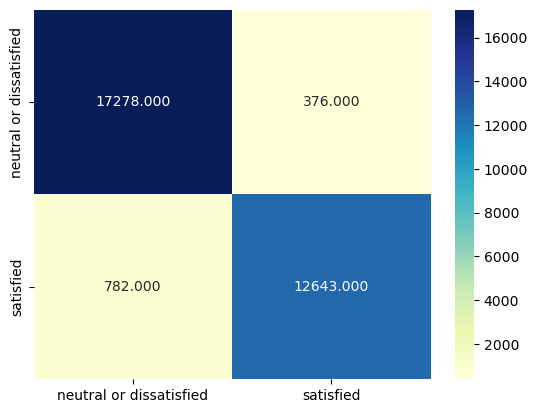

In [59]:
import seaborn as sns
labels = ["neutral or dissatisfied","satisfied"]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)

In [60]:
prediction = random_forest.predict(np.array([[5676,0,0,67,1,2,1,287,3,4,4,3,4,3,2,4,5,4,3,8,9,7,5]]))
print(prediction)

['satisfied']


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [61]:
prediction = random_forest.predict(np.array([[5047,1,1,25,0,0,235,3,2,3,1,1,1,5,3,1,4,1,1,2,7,9,9]]))
print(prediction)

['neutral or dissatisfied']


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


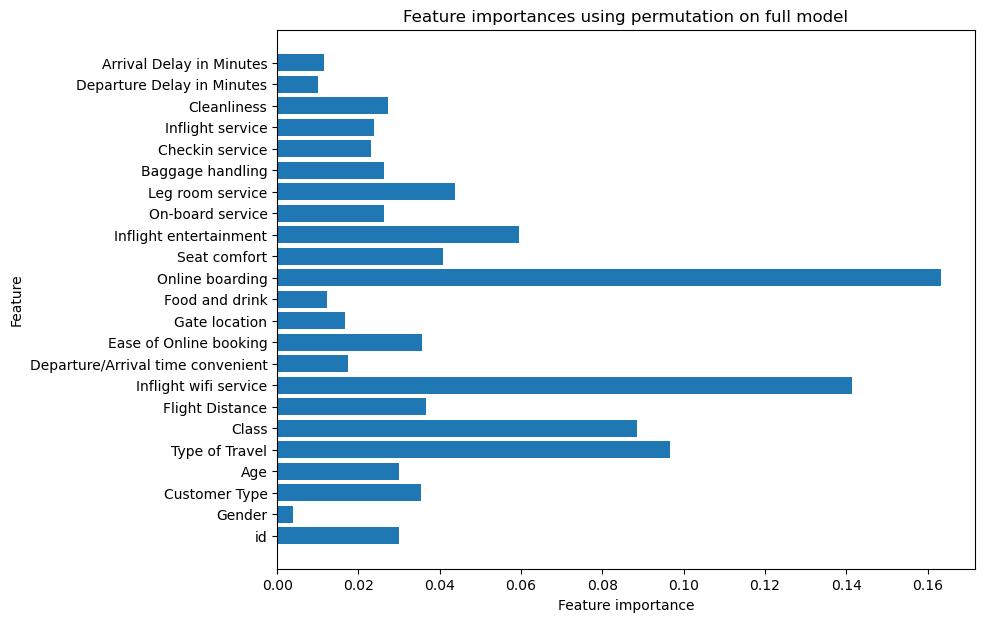

In [62]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()